In [1]:
import os
from classy import Class
from matplotlib import pyplot as plt
from getdist import plots, MCSamples
import getdist
from fit_test import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [20, 12]

2023-11-07 17:10:42.940314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba
2023-11-07 17:10:42.940350: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [105]:
dir_LRG = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/'
dir_ELG = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/ELG/z1.100/'
pk02_max_free_v25 = np.load(os.path.join(dir_LRG,'Pk_0_2_kmin2_kmax25_rescaled25_all_biases_maximal_freedom_nersc_data.npy'),allow_pickle=True).item()
autre = np.load(os.path.join(dir_LRG,'Pk_Bk_0_2_000_202_kmin2_kmaxpk18_kmaxbk8_rescaled25_b1_b2_bG2_bGamma3_Pshot_Bshot_fnl.npy'),allow_pickle=True).item()
cosmo = np.load(os.path.join(dir_LRG,'Pk_0_2_4_all.npy'),allow_pickle=True).item()

(array([34., 35., 33., 41., 50., 40., 50., 53., 38., 45., 51., 46., 41.,
        54., 68., 53., 47., 43., 45., 38., 54., 51., 56., 52., 56., 44.,
        36., 46., 55., 38., 48., 46., 44., 52., 46., 35., 47., 42., 49.,
        51., 41., 48., 49., 37., 53., 54., 51., 47., 38., 43., 46., 39.,
        52., 44., 46., 45., 37., 26., 44., 41., 24., 40., 33., 26., 23.,
        28., 28., 24., 26., 14.]),
 array([0.02070556, 0.02075539, 0.02080522, 0.02085504, 0.02090487,
        0.0209547 , 0.02100453, 0.02105436, 0.02110419, 0.02115402,
        0.02120385, 0.02125368, 0.02130351, 0.02135334, 0.02140317,
        0.021453  , 0.02150282, 0.02155265, 0.02160248, 0.02165231,
        0.02170214, 0.02175197, 0.0218018 , 0.02185163, 0.02190146,
        0.02195129, 0.02200112, 0.02205095, 0.02210077, 0.0221506 ,
        0.02220043, 0.02225026, 0.02230009, 0.02234992, 0.02239975,
        0.02244958, 0.02249941, 0.02254924, 0.02259907, 0.0226489 ,
        0.02269873, 0.02274856, 0.02279839, 0.02284821, 

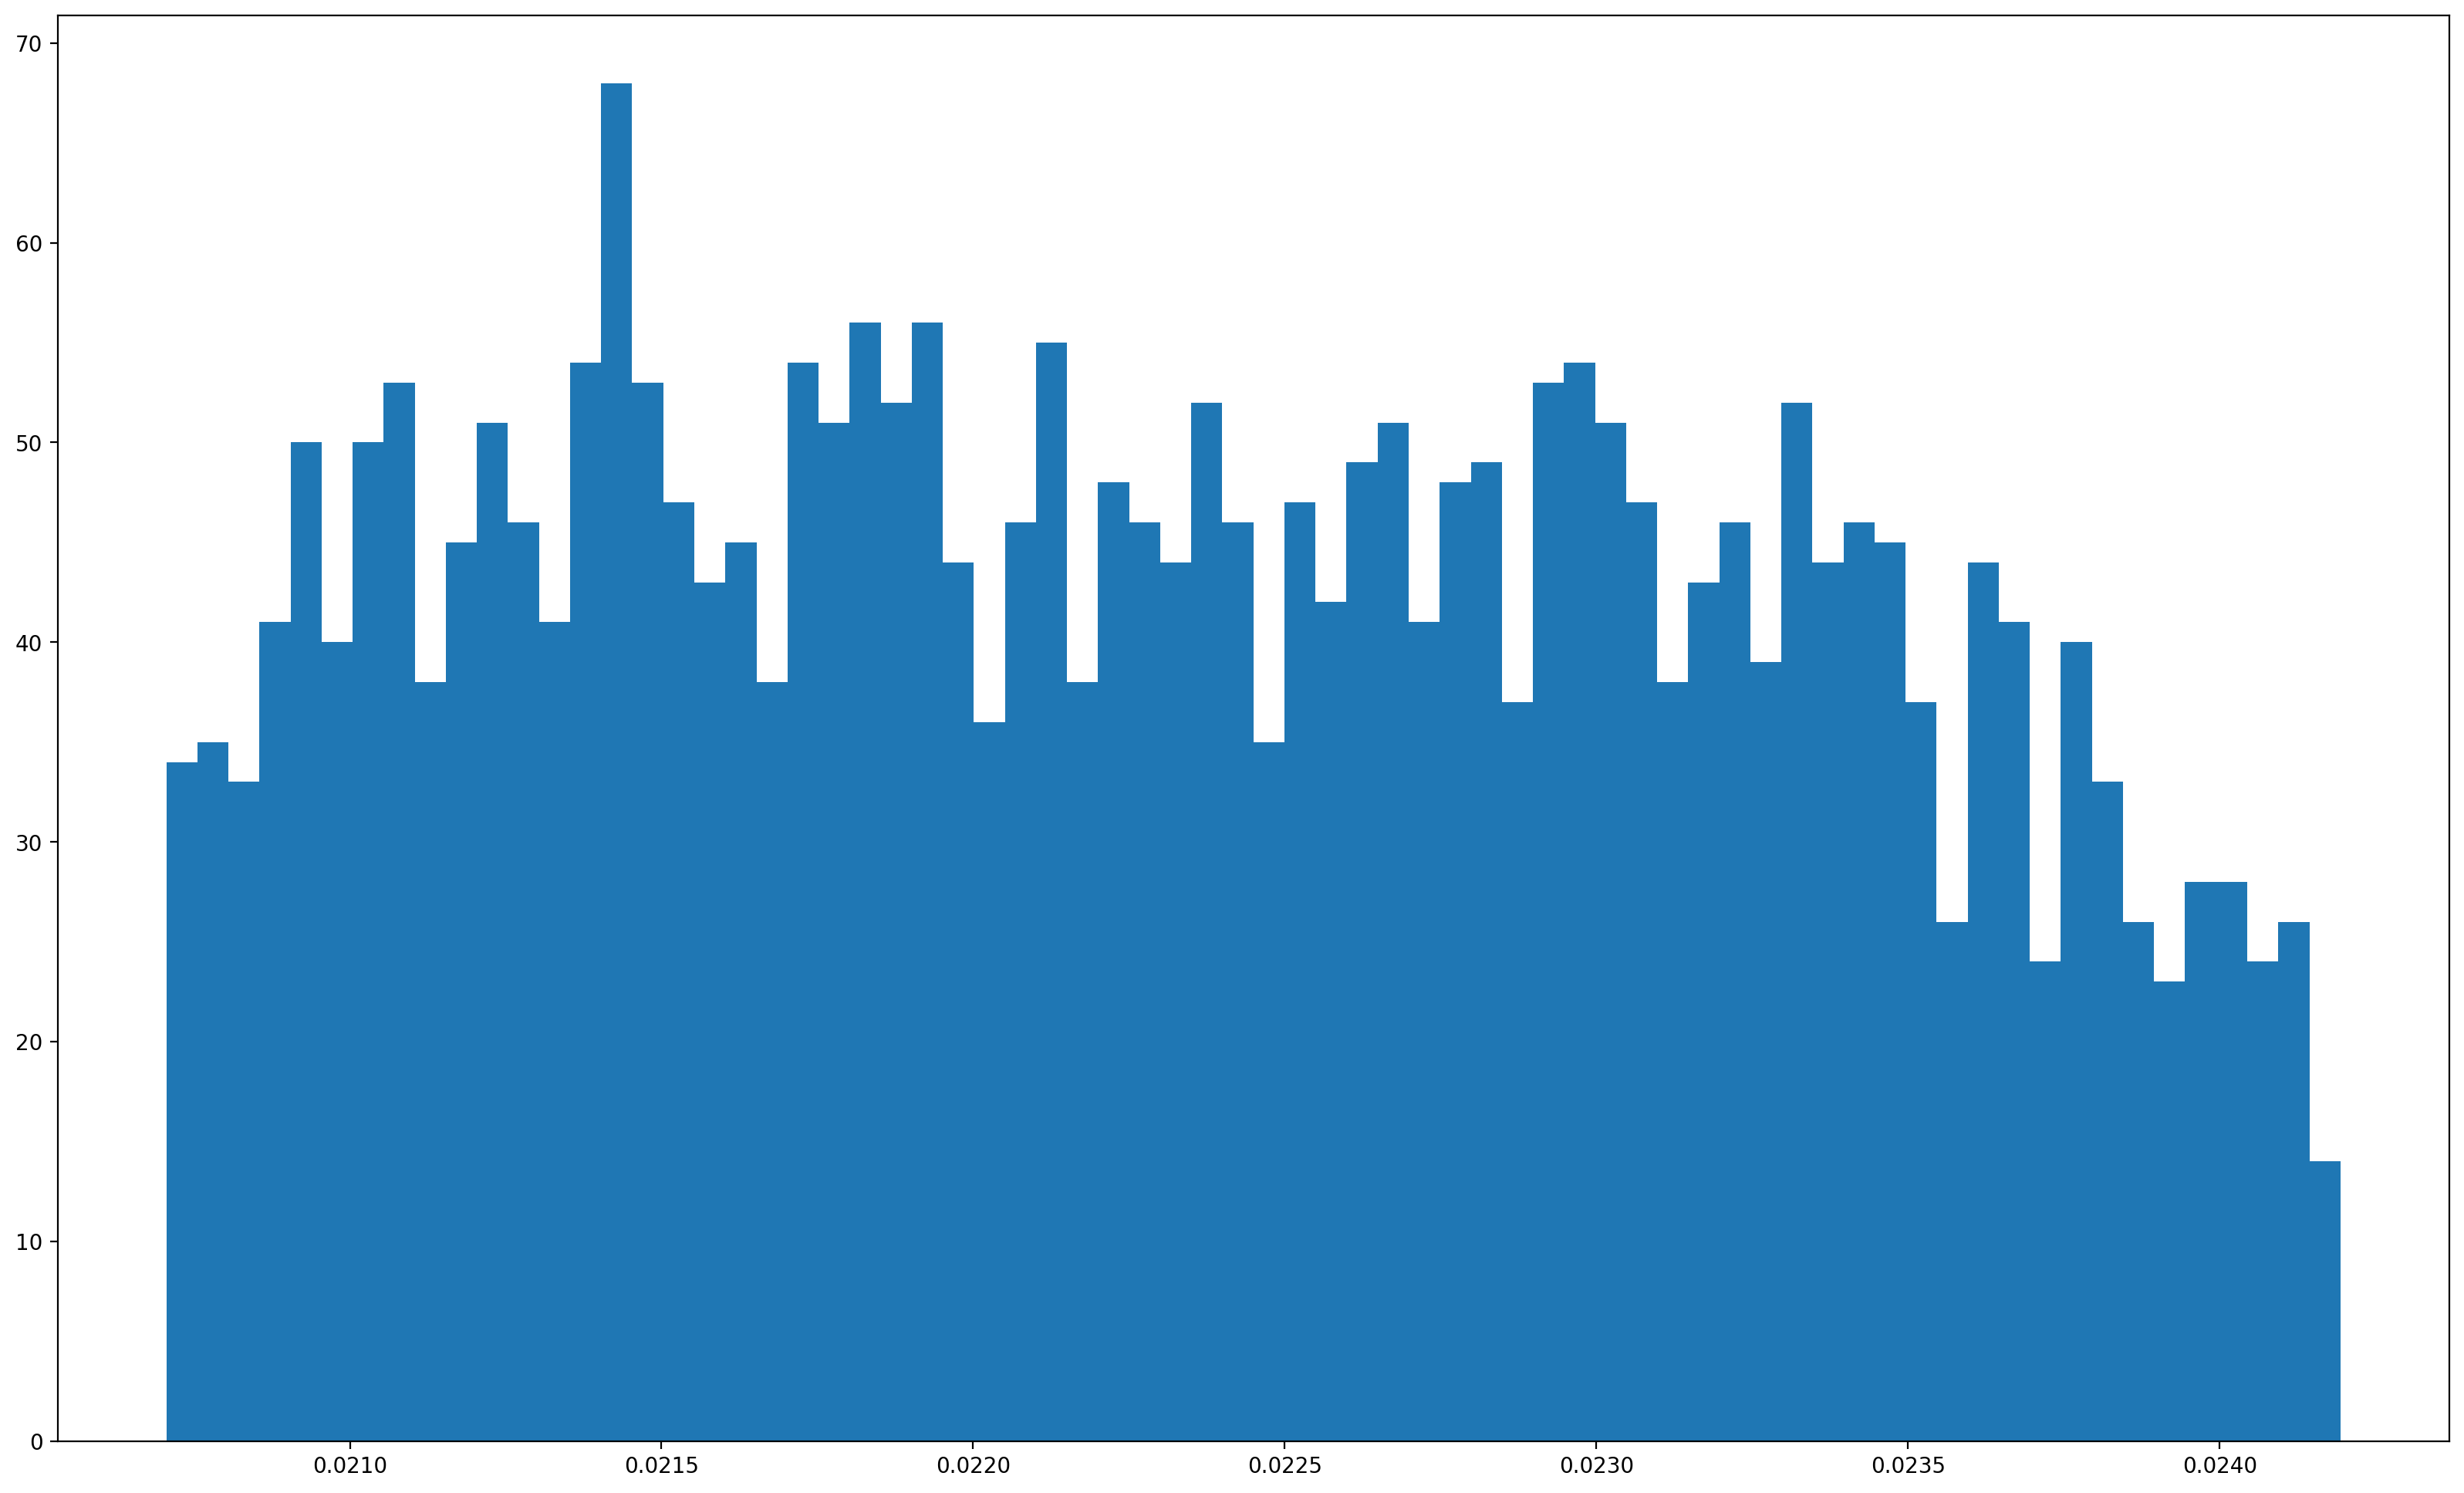

In [109]:
test = cosmo['sampler']['samples'][:,1]
plt.hist(test, bins=70)

In [110]:
kde = gaussian_kde(test)
x = np.linspace(np.min(test), np.max(test), 1000)
maxx = np.max(kde(x))
approx = kde(x)

T = kde.integrate_box_1d(np.min(x), np.max(x))
print(T)
maxb = x[np.argmax(kde(x))]

0.9694415147503217


0.08557462850531704
0.11798522905544476 0.1315296065207716
0.12484314169611659 + 0.006686464824655028 - 0.006857912640671829


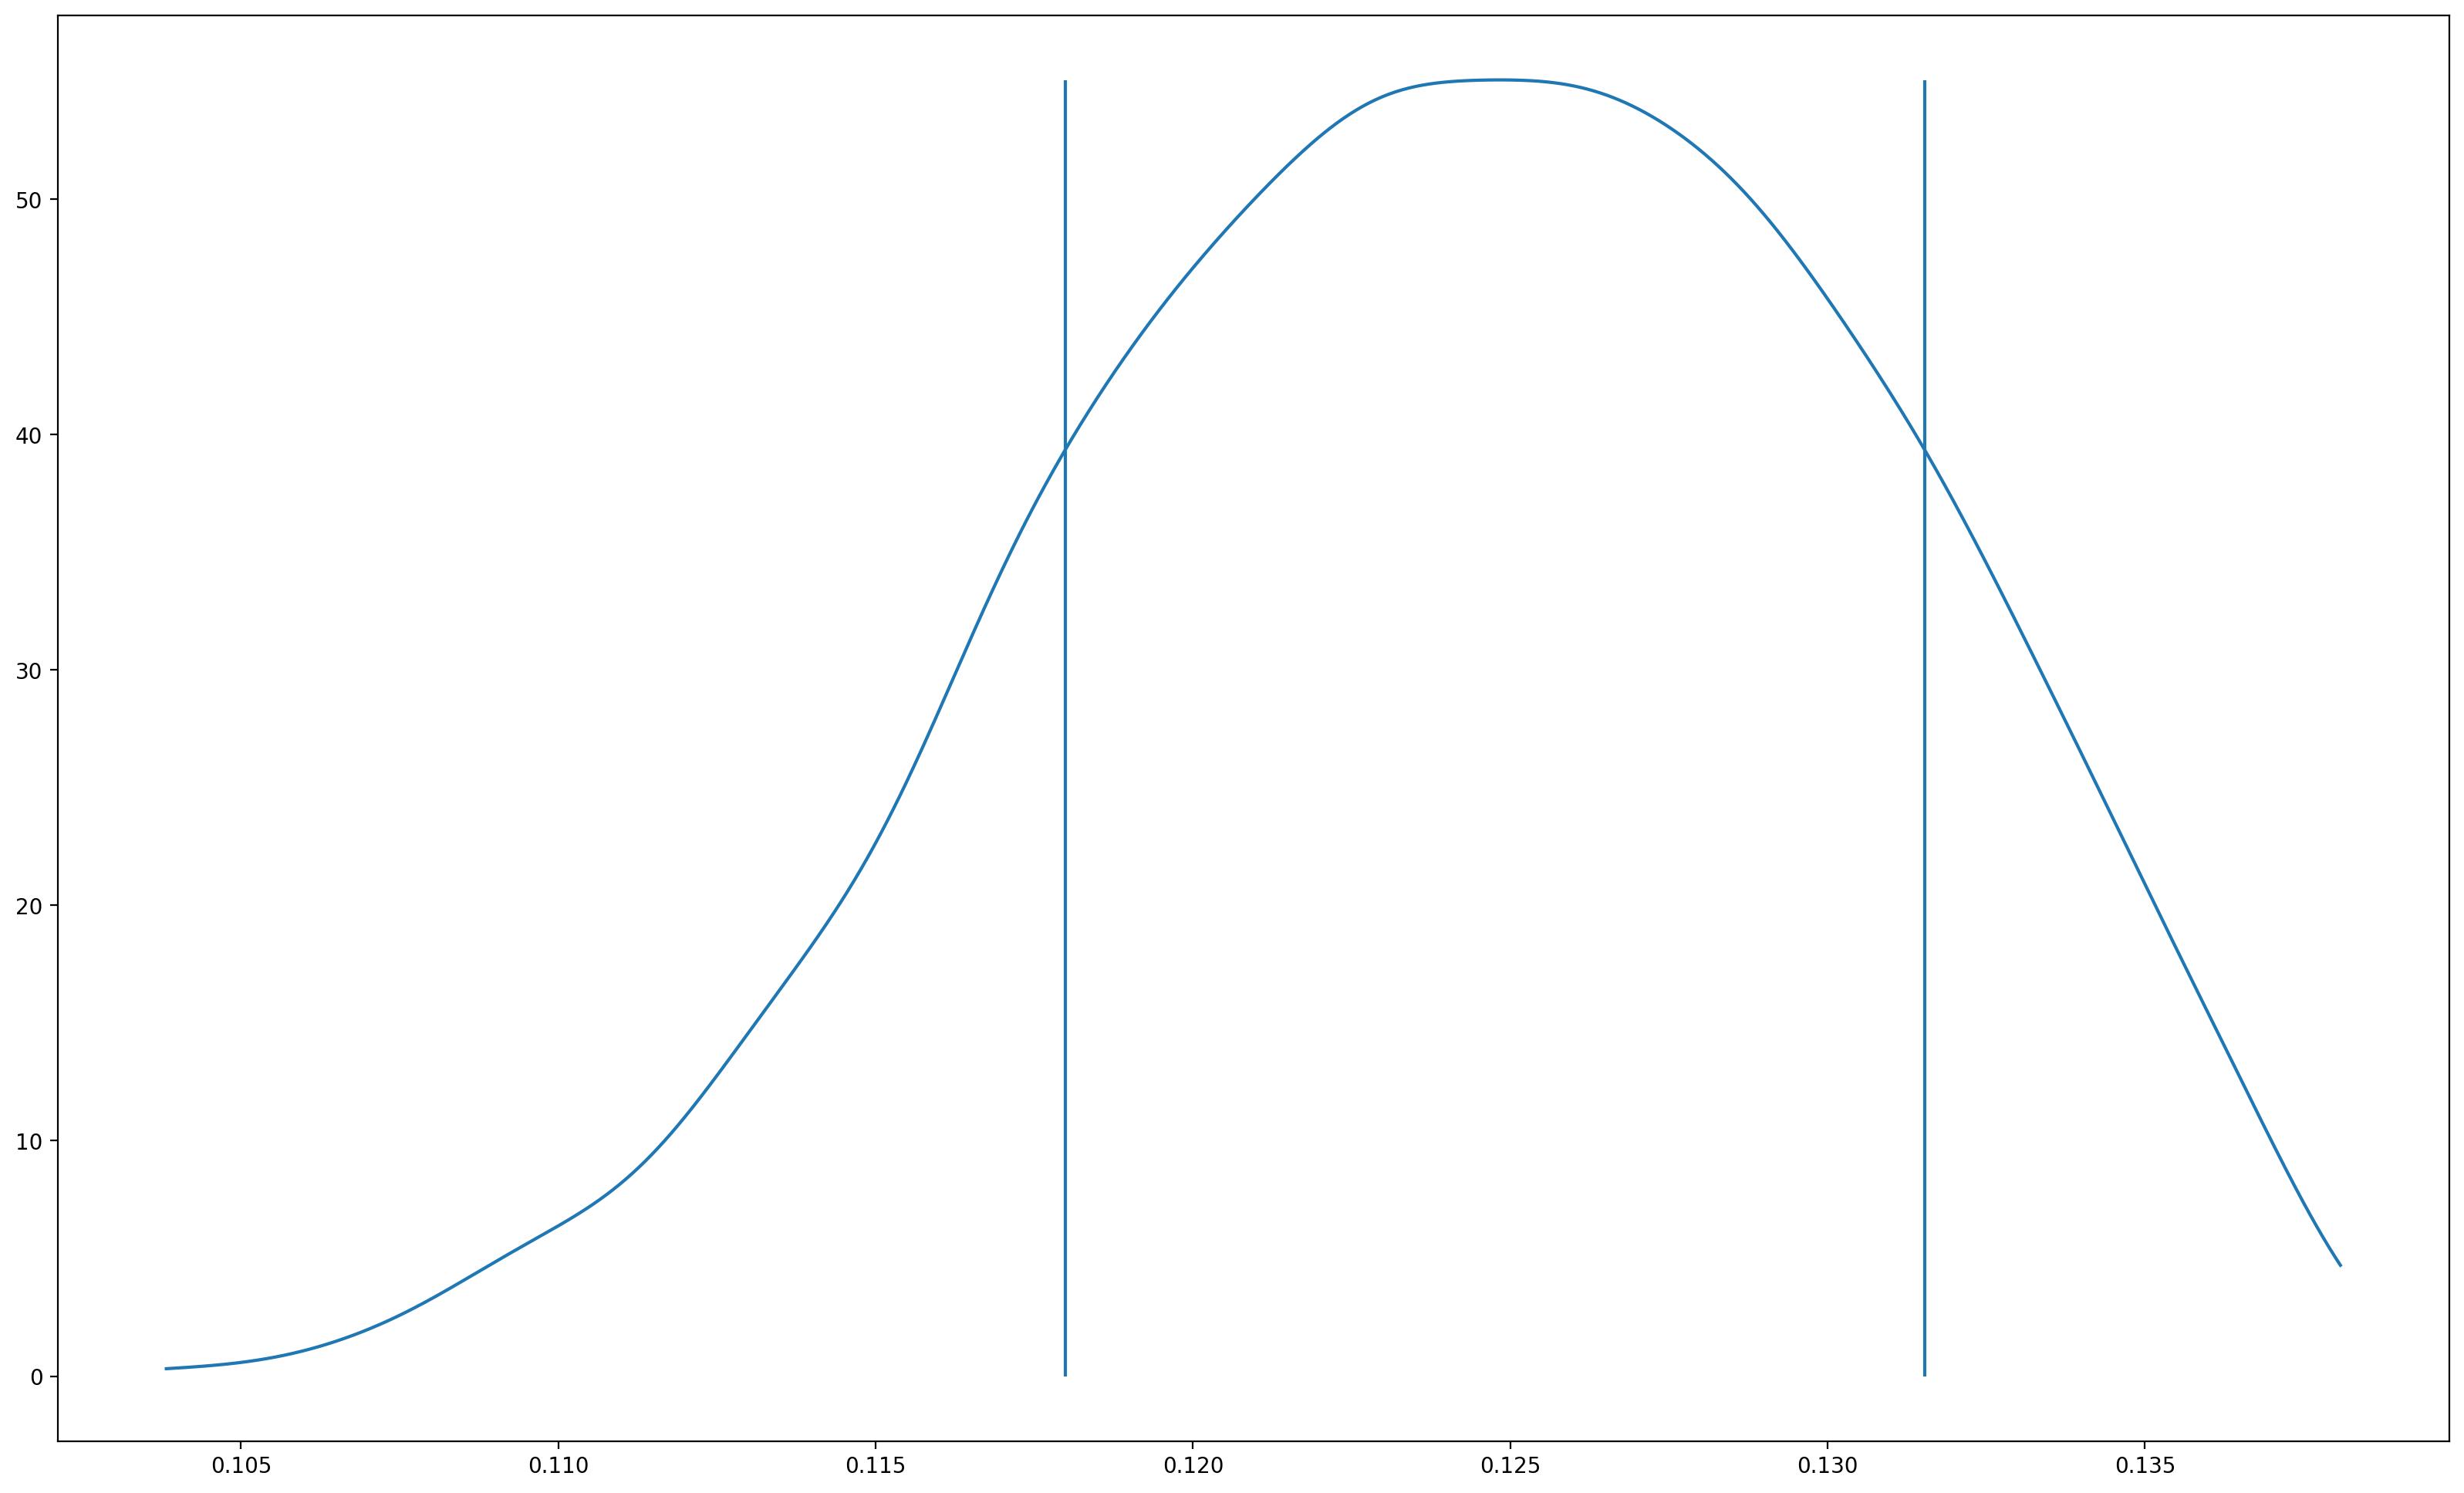

In [114]:
test = cosmo['sampler']['samples'][:,0]
kde = gaussian_kde(test)
x = np.linspace(np.min(test), np.max(test), 1000)
maxx = np.max(kde(x))
approx = kde(x)
T = kde.integrate_box_1d(np.min(x), np.max(x))
maxb = x[np.argmax(kde(x))]
plt.plot(x, kde(x))
print(approx[-1]/maxx)
for i in range(1000):
    cond = approx>maxx*(1-(i+1)/1001)
    if kde.integrate_box_1d(np.min(x[cond]), np.max(x[cond]))/T >= .68:
        plt.vlines(np.min(x[cond]), 0, np.max(approx))
        plt.vlines(np.max(x[cond]), 0, np.max(approx))
        print(np.min(x[cond]), np.max(x[cond]))
        print(maxb, '+', np.max(x[cond])-maxb, '-', maxb-np.min(x[cond]))
        break